In [2]:
import pandas as pd
from matplotlib import pyplot as plt 
import numpy as np
%matplotlib inline

In [3]:
df = pd.read_csv("dataset.csv")
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [4]:
 df.drop('customerID',axis='columns',inplace=True)

In [5]:
pd.to_numeric(df.TotalCharges,errors='coerce')

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [6]:
df1 = df[df.TotalCharges != ' '].copy()
df1.shape

(7032, 20)

In [7]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

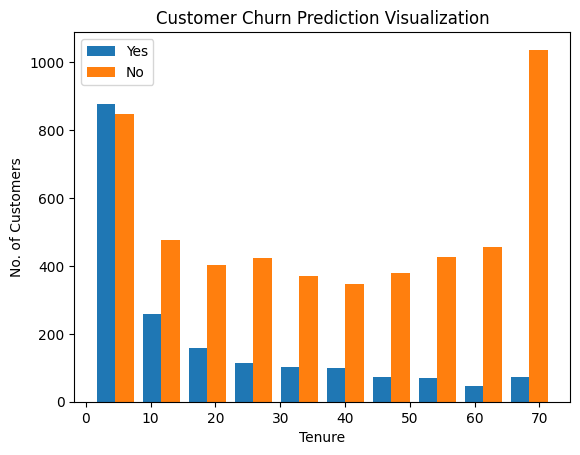

In [8]:
tenure_churn_no = df1[df1.Churn=="No"].tenure
tenure_churn_yes = df1[df1.Churn=="Yes"].tenure
plt.title("Customer Churn Prediction Visualization")
plt.xlabel("Tenure")
plt.ylabel("No. of Customers")

plt.hist([tenure_churn_yes,tenure_churn_no],label=['Yes','No'])
plt.legend()

In [9]:
for col in df1:
    if df1[col].dtypes == "object":
        print(f"{col} : {df1[col].unique()}")
        print()

gender : ['Female' 'Male']

Partner : ['Yes' 'No']

Dependents : ['No' 'Yes']

PhoneService : ['No' 'Yes']

MultipleLines : ['No phone service' 'No' 'Yes']

InternetService : ['DSL' 'Fiber optic' 'No']

OnlineSecurity : ['No' 'Yes' 'No internet service']

OnlineBackup : ['Yes' 'No' 'No internet service']

DeviceProtection : ['No' 'Yes' 'No internet service']

TechSupport : ['No' 'Yes' 'No internet service']

StreamingTV : ['No' 'Yes' 'No internet service']

StreamingMovies : ['No' 'Yes' 'No internet service']

Contract : ['Month-to-month' 'One year' 'Two year']

PaperlessBilling : ['Yes' 'No']

PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']

Churn : ['No' 'Yes']



In [10]:
df1.replace("No internet service","No",inplace=True)
df1.replace("No phone service","No",inplace=True)

In [11]:
yes_no_cols = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
               'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

for col in yes_no_cols:
     df1[col] = df1[col].replace({'Yes': 1, 'No': 0}).astype(int)

C:\Users\Abhay\AppData\Local\Temp\ipykernel_21944\1382446706.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1[col] = df1[col].replace({'Yes': 1, 'No': 0}).astype(int)
C:\Users\Abhay\AppData\Local\Temp\ipykernel_21944\1382446706.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1[col] = df1[col].replace({'Yes': 1, 'No': 0}).astype(int)
C:\Users\Abhay\AppData\Local\Temp\ipykernel_21944\1382446706.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old

In [12]:
for col in df1:
        print(f"{col} : {df1[col].unique()}")
        print()

gender : ['Female' 'Male']

SeniorCitizen : [0 1]

Partner : [1 0]

Dependents : [0 1]

tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]

PhoneService : [0 1]

MultipleLines : [0 1]

InternetService : ['DSL' 'Fiber optic' 'No']

OnlineSecurity : [0 1]

OnlineBackup : [1 0]

DeviceProtection : [0 1]

TechSupport : [0 1]

StreamingTV : [0 1]

StreamingMovies : [0 1]

Contract : ['Month-to-month' 'One year' 'Two year']

PaperlessBilling : [1 0]

PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']

MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]

TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]

Churn : [0 1]



In [13]:
df1['gender'] = df1['gender'].replace({'Female': 1, 'Male': 0}).astype(int)

C:\Users\Abhay\AppData\Local\Temp\ipykernel_21944\328604783.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['gender'] = df1['gender'].replace({'Female': 1, 'Male': 0}).astype(int)


In [14]:
df1 = pd.get_dummies(data=df1,columns=['InternetService','Contract','PaymentMethod'])

In [15]:
to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df1[to_scale] =scaler.fit_transform(df1[to_scale])

In [16]:
X = df1.drop('Churn',axis='columns')
y = df1['Churn']

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=18)

In [19]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(26,), activation='relu'),
    keras.layers.Dense(1, activation="sigmoid")    
])

model.compile(optimizer="adam",
             loss="binary_crossentropy",
             metrics=["accuracy"])

model.fit(X_train,y_train,epochs=100)

Epoch 1/100


C:\Users\Abhay\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6451 - loss: 0.6129
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7759 - loss: 0.4348
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7856 - loss: 0.4412
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7974 - loss: 0.4249
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7938 - loss: 0.4263
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8031 - loss: 0.4171
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8053 - loss: 0.4126
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8041 - loss: 0.4212
Epoch 9/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7998 - loss: 0.4151
Epoch 10/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8045 - loss: 0.4140
Epoch 11/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8094 - loss: 0.4097
Epoch 12/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

In [20]:
model.evaluate(X_test,y_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8005 - loss: 0.4249


[0.4225558936595917, 0.796730637550354]

In [21]:
yp = model.predict(X_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [22]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [24]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1046
           1       0.63      0.50      0.56       361

    accuracy                           0.80      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.79      0.80      0.79      1407



Text(95.72222222222221, 0.5, 'Truth')

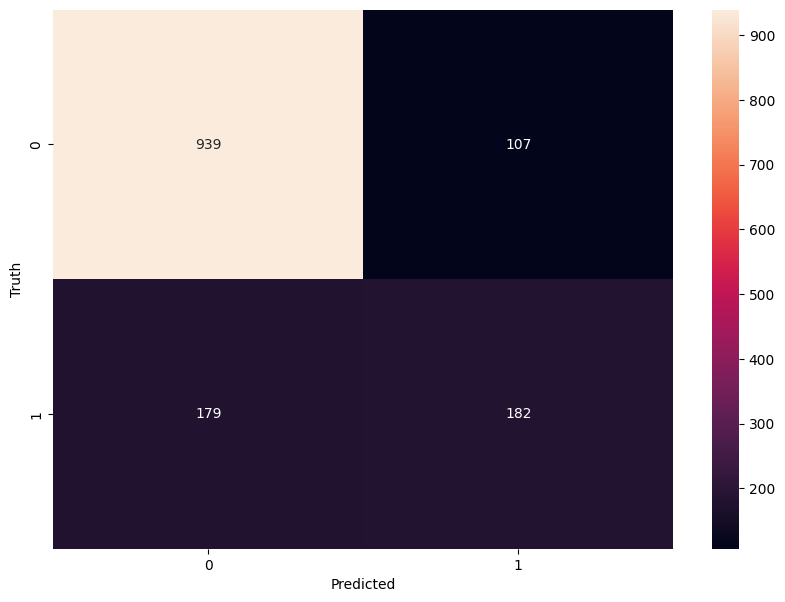

In [26]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm,annot=True,fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Truth")